In [1]:
from skimage import io
import cv2
from matplotlib.pyplot import imshow, show
import numpy as np
import imutils

Leitura da imagem pbm

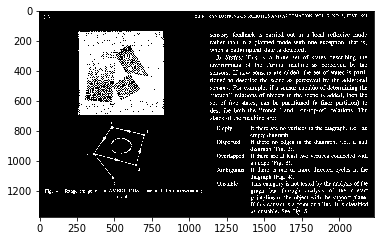

In [112]:
img = cv2.imread('inputs/bitmap.pbm', 0)
img = -cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
imshow(img, cmap='gray')
show()

In [3]:
new_img = np.zeros((img.shape[0],img.shape[1]))
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        if abs(img[x][y]) == 0:
            new_img[x][y] = 1
        else:
            new_img[x][y] = 0

### Passo 1:
    Dilatação da imagem original com um elemento estruturante de 1 pixel de altura e 100 pixels de largura.

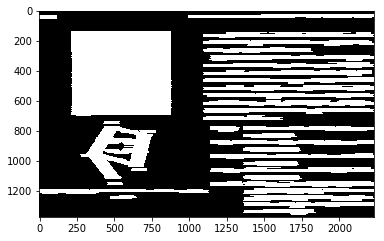

In [4]:
img_1 = img.copy()
kernel = np.ones((1,100), np.uint8)
img_dlt_1 = cv2.dilate(img_1,-kernel,iterations = 1)
imshow(img_dlt_1,cmap='gray')
show()

### Passo 2:
    Erosão da imagem resultante com o mesmo elemento estruturante do passo (1).

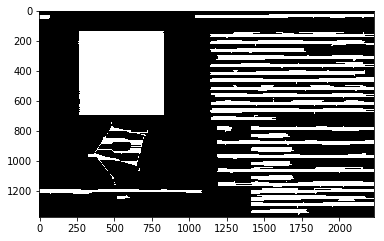

In [5]:
kernel = np.ones((1,100), np.uint8)
img_ers_2 = cv2.erode(img_dlt_1,-kernel,iterations = 1)
imshow(img_ers_2,cmap='gray')
show()

In [6]:
temp = cv2.normalize(img_ers_2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
bin_image = np.ones((temp.shape[0], temp.shape[1]))
bin_image[temp == 1] = 0
cv2.imwrite('outputs/bitmap-filtro-1.pbm',bin_image)

True

### Passo 3:
    Dilatação da imagem original com um elemento estruturante de 200 pixels de altura e 1 pixel de largura.

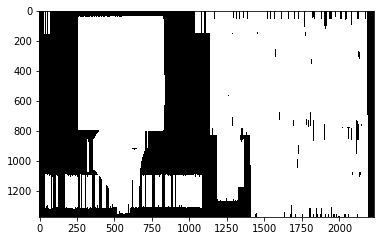

In [7]:
img_3 = img.copy()
kernel = np.ones((200,1), np.uint8)
img_dlt_3 = cv2.dilate(img_3,-kernel,iterations = 1)
imshow(img_dlt_3,cmap='gray')
show()

### Passo 4:
    Erosão da imagem resultante com o mesmo elemento estruturante do passo (3).

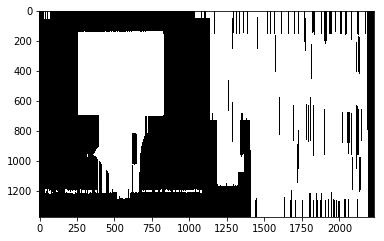

In [8]:
kernel = np.ones((200,1), np.uint8)
img_ers_4 = cv2.erode(img_dlt_3,-kernel,iterations = 1)
imshow(img_ers_4,cmap='gray')
show()

In [9]:
temp = cv2.normalize(img_ers_4, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
bin_image = np.ones((temp.shape[0], temp.shape[1]))
bin_image[temp == 1] = 0
cv2.imwrite('outputs/bitmap-filtro-2.pbm',bin_image)

True

### Passo 5:
    Aplicação da intersecção (AND) dos resultados dos passos (2) e (4).

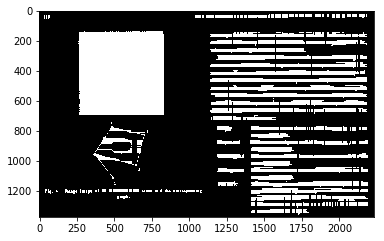

In [10]:
te = cv2.normalize(img_ers_2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).astype(int)
te2 = cv2.normalize(img_ers_4, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).astype(int)
img_and_5 = te & te2
img_and_5 = cv2.normalize(img_and_5, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).astype(int)
imshow(img_and_5, cmap='gray')
show()

In [11]:
bin_image = np.ones((img_and_5.shape[0], img_and_5.shape[1]))
bin_image[img_and_5 == 1] = 0
cv2.imwrite('outputs/bitmap-and.pbm',bin_image)

True

### Passo 6:
     Fechamento do resultado obtido no passo (5) com um elemento estruturante de 1 pixel de altura e 30 pixels de   largura

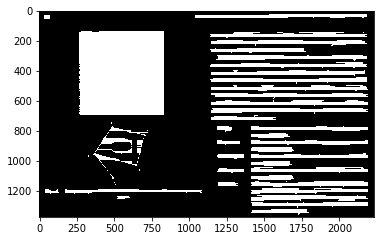

In [12]:
kernel = np.ones((1,30), np.uint8)
img_clg_6 = cv2.morphologyEx(img_and_5.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
imshow(img_clg_6, cmap='gray')
show()

In [13]:
temp = cv2.normalize(img_clg_6, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
bin_image = np.ones((temp.shape[0], temp.shape[1]))
bin_image[temp == 1] = 0
cv2.imwrite('outputs/bitmap-fechamento.pbm',bin_image)

True

### Passo 7
    Aplicação de algoritmo para identificação de componentes conexos (ver programa fornecido) sobre o resultado do    passo (6)

Numero de componentes conexas encontradas: 54


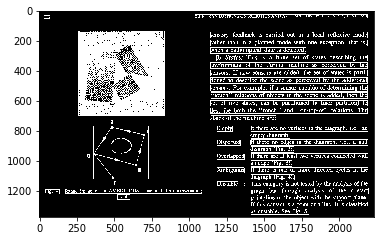

In [14]:
img_7 = img_clg_6.copy()
img_7 = cv2.normalize(img_7,  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_7)

img_cnx_7 = img.copy()
i = 0
for stat in stats:
    img_cnx_7 = cv2.rectangle(img_cnx_7,(stat[0],stat[1]),(stat[0] + stat[2],stat[1] + stat[3]),(0, 0, 0), 2)

print("Numero de componentes conexas encontradas:", num_labels)

imshow(img_cnx_7, cmap='gray')
show()

In [15]:
cv2.imwrite('outputs/bitmap-componentes-conexos.pbm',-img_cnx_7)

True

### Passo 8
    Para cada retângulo envolvendo um objeto, calcule:

    A. Razão entre o número de pixels pretos e o número total de pixels (altura × largura)

In [16]:
img_8 = new_img.copy()
raz_pb_8 = []

for stat in stats:
    square_img = img_8[stat[1]:stat[1]+stat[3], stat[0]:stat[0]+stat[2]]
    blacks = np.sum(square_img)
    total = square_img.shape[0] * square_img.shape[1]
    raz_pb_8.append(blacks/total)

print("Razoes de pixels pretos para o total de pixels:")
print(raz_pb_8)

Razoes de pixels pretos para o total de pixels:
[0.15326995947384442, 0.29763478260869564, 0.36848072562358275, 0.0, 0.8370760255786994, 0.21467495219885277, 0.22251434034416825, 0.2552410901467505, 0.20510274234206707, 0.20871537726838588, 0.45, 0.2235205237975321, 0.4, 0.2167304015296367, 0.23410611854684513, 0.22114463601532566, 0.2165514536451439, 0.21003088689513164, 0.3038932146829811, 0.4125, 0.22203742203742205, 0.06213158654934691, 0.3115468409586057, 0.2800041420731076, 0.0, 0.21770334928229665, 0.2964365639524875, 0.6875, 0.2602540834845735, 0.28764957264957264, 0.52, 0.296448087431694, 0.35526315789473684, 0.2305032654629274, 0.2134240851809421, 0.2786322233836046, 0.45454545454545453, 0.26157299167679793, 0.56, 0.23493877015003775, 0.4166666666666667, 0.37456271864067964, 0.0, 0.0, 0.21017771657157847, 0.23585969100192294, 0.75, 0.22395833333333334, 0.2980956082394092, 0.2354043392504931, 0.0, 0.0, 0.220748987854251, 0.23690878378378377]


    B. Razão entre o número de transições verticais e horizontais branco para preto e o número total de pixels       pretos.

In [17]:
raz_trs_8 = []
for stat in stats:
    x_ini = stat[0]
    y_ini = stat[1]
    width = stat[2]
    height = stat[3]
    transitions = 0
    for j in range(y_ini, y_ini + height - 1):
        for i in range(x_ini, x_ini + width - 1):
            if int(new_img[j,i]) == 0:
                if bool(new_img[j, i]) ^ bool(new_img[j + 1, i]):
                    transitions = transitions + 1
                if bool(new_img[j, i]) ^ bool(new_img[j, i + 1]):
                    transitions = transitions + 1
    
    total_pretos = np.sum(new_img[stat[1]:stat[1]+stat[3], stat[0]:stat[0]+stat[2]])
    if total_pretos == 0:
        raz_trs_8.append(0.0)
    else:
        raz_trs_8.append(transitions/total_pretos)
        
print("Razoes de transicoes entre pixels brancos e pretos e o total de pixels pretos:")
print(raz_trs_8)

Razoes de transicoes entre pixels brancos e pretos e o total de pixels pretos:
[0.23728240482802912, 0.36788594133457986, 0.3507692307692308, 0.0, 0.16786356478327397, 0.3194166109997773, 0.30698174006444684, 0.3138524719633549, 0.32998137802607075, 0.3226175494794646, 0.0, 0.32852636322667866, 0.125, 0.32796647551830616, 0.31638591117917303, 0.3195452084461289, 0.3222775639574372, 0.32481325863678806, 0.31137140068326014, 0.3333333333333333, 0.33692259675405745, 0.2552148781100779, 0.2972027972027972, 0.3139792899408284, 0.0, 0.32038384151060206, 0.3083623693379791, 0.09090909090909091, 0.3183403068340307, 0.33145149309166544, 0.07692307692307693, 0.3036354326676907, 0.2716049382716049, 0.3308333333333333, 0.3320176823492264, 0.33065380493033225, 0.3263157894736842, 0.30818734358240973, 0.07142857142857142, 0.330072666294019, 0.3142857142857143, 0.31487658438959304, 0.0, 0.0, 0.3227769110764431, 0.37644082091650266, 0.0, 0.3364341085271318, 0.35071707953063885, 0.3181119955313504, 0.0

# Passo 9
    Criação de uma regra para classificar cada componente conexo, de acordo com as medidas obtidas no passo (8),     como texto e não texto.

Numero de linhas de texto identificadas na imagem:  35


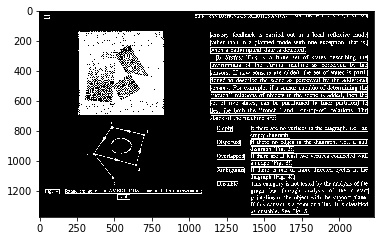

In [107]:
img_9 = img.copy()
lines = []
for i in range(len(stats)):
    stat = stats[i]
    blck_pct = raz_pb_8[i]
    trns_pct = raz_trs_8[i]
    
    if (blck_pct > 0.2 and blck_pct < 0.38) and (trns_pct > 0.25 and trns_pct < 0.38):
        if stat[2] > 15:
            lines.append(stat)
            img_9 = cv2.rectangle(img_9,(stat[0],stat[1]),(stat[0] + stat[2],stat[1] + stat[3]),(0, 0, 0), 2)

print("Numero de linhas de texto identificadas na imagem: ", len(lines))
imshow(img_9, cmap='gray')
show()

In [108]:
cv2.imwrite('outputs/bitmap-textos.pbm',-img_9)

True

### Passo 10
    Aplicação de operadores morfológicos apropriados para segmentar cada linha do texto em blocos de palavras.      Coloque um retângulo envolvendo cada palavra na imagem original. Calcule o número total de linhas de texto e de blocos de palavras na imagem.

In [109]:
img_10 = img.copy()
words = []
for line in lines:
    temp_image = img_10[line[1]:line[1]+line[3],line[0]:line[0]+line[2]]
    temp_image = cv2.dilate(temp_image,np.ones((7,1)),iterations = 1)
    temp_image = cv2.erode(temp_image,np.ones((7,1)),iterations = 1)
    temp_image = cv2.morphologyEx(temp_image, cv2.MORPH_CLOSE, np.ones((1,11)))
    temp_image = cv2.normalize(temp_image,  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    temp_num_labels, temp_labels, temp_stats, temp_centroids = cv2.connectedComponentsWithStats(temp_image)
    for x in temp_stats[1:]:
        x[0] = x[0] + line[0]
        x[1] = x[1] + line[1]
        words.append(x)

Numero de palavras encontradas:  241


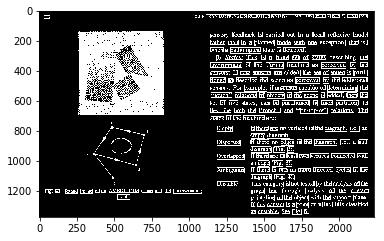

In [110]:
new_words = []
for i in range(len(words)):
    word = words[i]
    img_10 = cv2.rectangle(img_10,(word[0],word[1]),(word[0] + word[2],word[1] + word[3]),(0, 0, 0), 2)
    new_words.append(word)

print("Numero de palavras encontradas: ", len(words))
imshow(img_10, cmap='gray')
show()

In [111]:
cv2.imwrite('outputs/bitmap-palavras.pbm',-img_10)

True